<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Aulas%20em%20notebooks%20separados/Aula_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

In [4]:
dados = pd.read_csv(url, sep=";", skiprows=3, skipfooter=12, encoding="ISO-8859-1",engine='python',thousands='.', decimal=',')

In [5]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")


In [6]:
usaveis = dados[colunas_usaveis]


In [7]:
usaveis = usaveis.set_index("Unidade da Federação")


In [8]:
ordenado_por_total = usaveis.sort_values("Total", ascending= False)

In [9]:
ordenado_col_interessadas = ordenado_por_total[ordenado_por_total.columns[6:-1]]


# Explorando

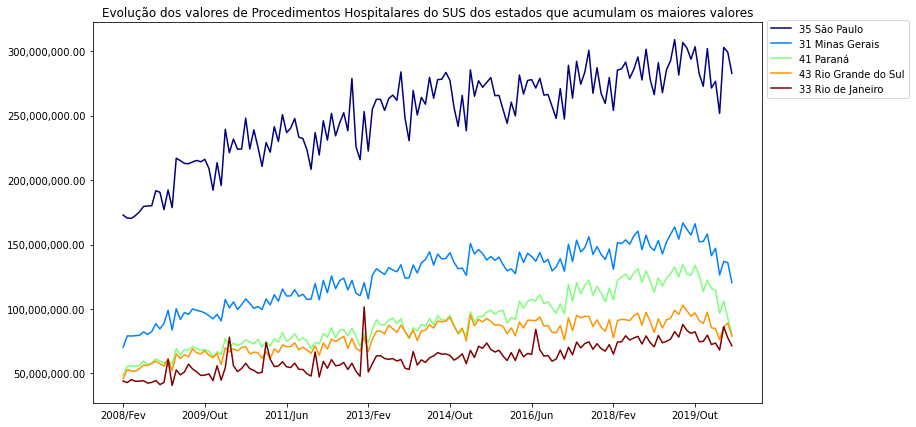

In [10]:
ax = ordenado_col_interessadas.head().T.plot(figsize=(12,7), cmap = 'jet')

plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS dos estados que acumulam os maiores valores")
plt.show()

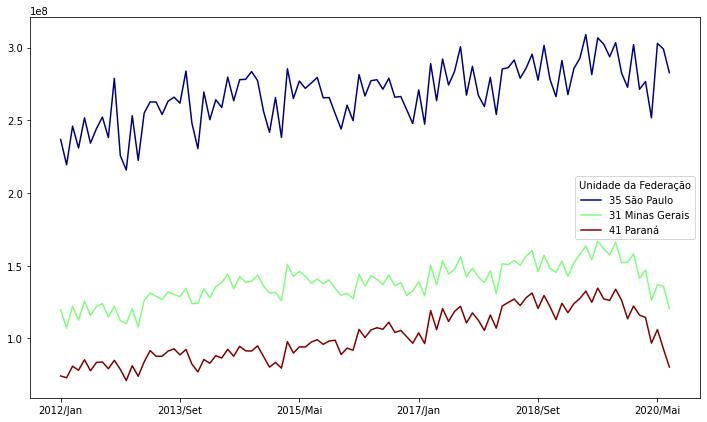

In [11]:
ax = ordenado_col_interessadas.head(3)[ordenado_col_interessadas.columns[47: 150]].T.plot(figsize=(12,7), cmap = 'jet')

Percebemos que a projeção do eixo 'y' não parte do valor 0. Isso pode resultar numa interpretação errada dos valores demonstrados.

(0.0, 350000000.0)

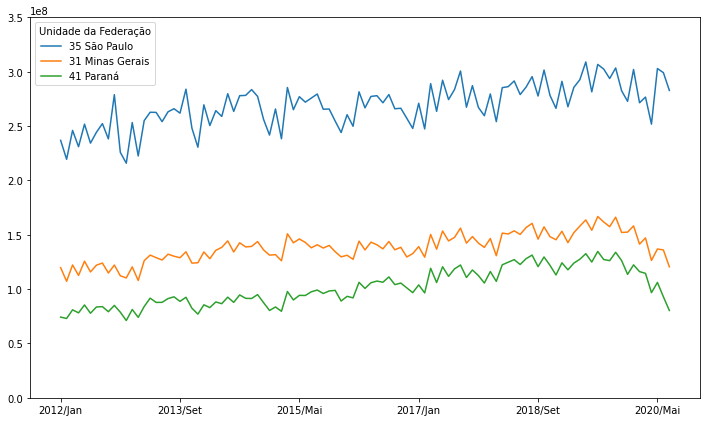

In [12]:
ordenado_col_interessadas[ordenado_col_interessadas.columns[47:]].head(3).T.plot(figsize=(12,7))
plt.ylim(0,350000000)

Ao plotar o mesmo gráfico com o eixo 'y' partindo do 0, percebemos uma diferença nas proporções dos valores dos estados. 

(100000000.0, 350000000.0)

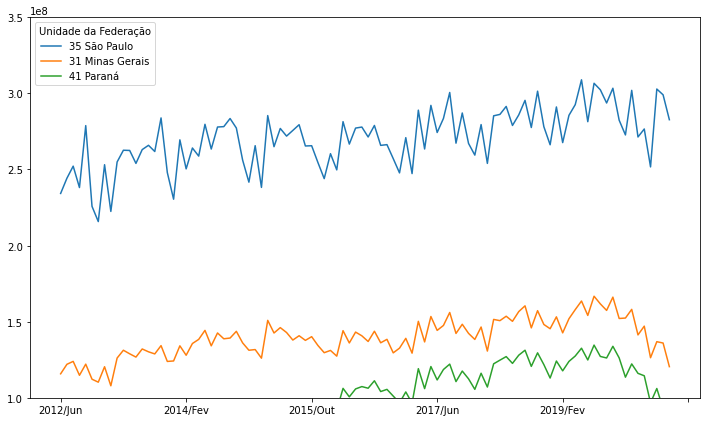

In [14]:
ordenado_col_interessadas[ordenado_col_interessadas.columns[52:]].head(3).T.plot(figsize=(12,7))
plt.ylim(100000000, 350000000)

In [16]:
ordenado_por_total.columns

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

último ano:

(0.0, 350000000.0)

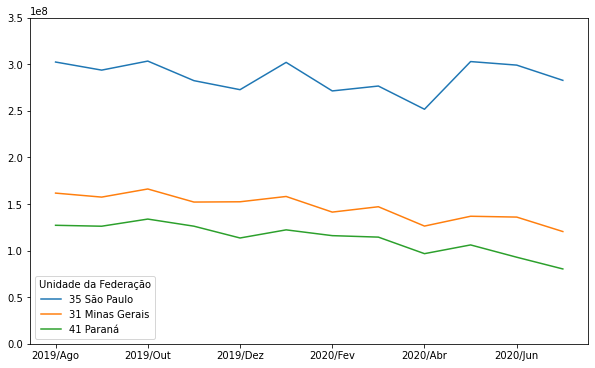

In [25]:

ordenado_col_interessadas[ordenado_col_interessadas.columns[-12:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350000000)

Ao plotar o gráfico levando em consideração apenas os valores dos últimos 12 meses, é demonstrada uma leve tendência de queda.

#### **Últimos dois anos:**

(0.0, 350000000.0)

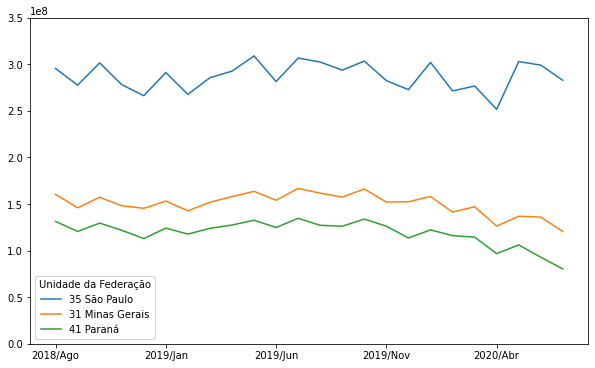

In [27]:
ordenado_col_interessadas[ordenado_col_interessadas.columns[-24:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350000000)

Ao plotar o gráfico levando em consideração apenas os valores dos últimos 24 meses, podemos interpretar que há uma tendência de queda em Minas Gerais e no Paraná, e São Paulo se mantém estável.

#### **Últimos três anos:**

(0.0, 350000000.0)

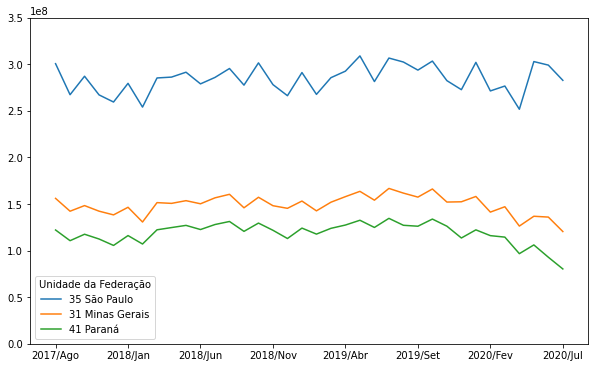

In [29]:
ordenado_col_interessadas[ordenado_col_interessadas.columns[-36:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350000000)

Ao plotar o gráfico levando em consideração apenas os valores dos últimos 36 meses, podemos perceber uma tendência de estabilização dos valores.

#### **Últimos 60 meses:**

(0.0, 350000000.0)

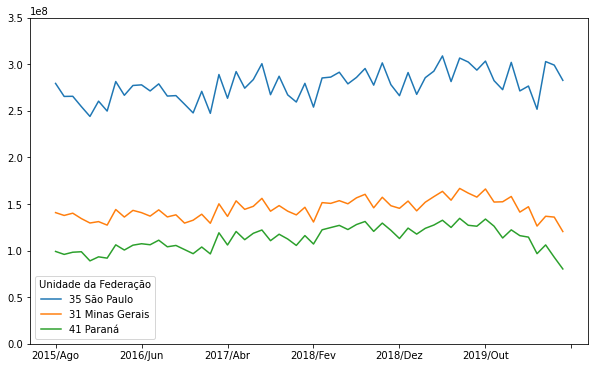

In [31]:
ordenado_col_interessadas[ordenado_col_interessadas.columns[-60:]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350000000)

E ao plotar o gráfico levando em consideração apenas os valores dos últimos 60 meses, é possível ver uma leve tendência de crescimento.

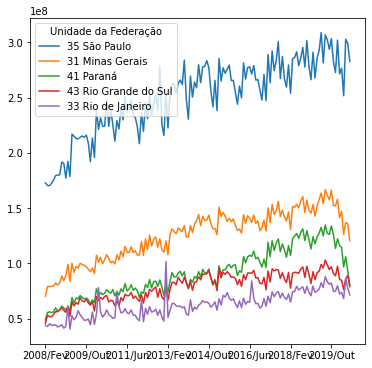

In [21]:
ordenado_col_interessadas.head(5).T.plot(figsize=(6,6))

Percebemos também que quando comprimimos o gráfico, as tendências de crescimento e declínio aparentam ser muito mais bruscas se ignorarmos os rótulos mostrados no eixo x (tempo).

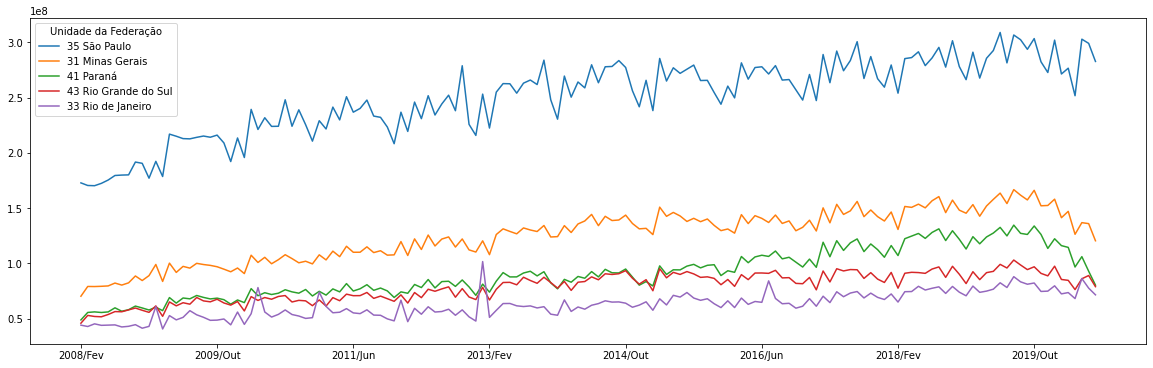

In [22]:
ordenado_col_interessadas.head(5).T.plot(figsize=(20,6))

Da mesma forma, se alongarmos o gráfico, as tendências de crescimento e declínio aparentam ser mais suaves.

A conclusão é que devemos nos atentar para não enviesarmos o grafico atravéz de projeções tendenciosas, seja com o intuito de manipular a interpretação de quem estiver consumindo o gráfico, ou até mesmo por falta de atenção. 